In [1]:
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import h5py

from autoencoder import Autoencoder, Autoencoder3D
from data import FluidDataset

In [2]:
ds = FluidDataset(fileroot='/media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64',
                           physics_variables=['density', 'vorticity', 'pressure'],
                           read_frames=False,
                           read_every_frames=2,
                           normalize_type='pm1')

Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_3.h5 (1/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_8.h5 (2/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_1.h5 (3/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_5.h5 (4/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_7.h5 (5/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_4.h5 (6/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_0.h5 (7/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_9.h5 (8/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_2.h5 (9/10)
Loaded /media/bamf-big/gefan/FluidDiff/data/smoke_plume_64x64/SmokePlume_R0.50_6.h5 (10/10)
Loaded 50000 samples, data shape: torch.Size([50000, 3, 64, 64])


In [3]:
dl = DataLoader(ds, batch_size=8, shuffle=True)

In [4]:
vae_rho = Autoencoder(in_channels=1, z_channels=1, use_variational=True, activation_type='relu').cuda()
vae_vort = Autoencoder(in_channels=1, z_channels=1, use_variational=True, activation_type='relu').cuda()
vae_pressure = Autoencoder(in_channels=1, z_channels=1, use_variational=True, activation_type='relu').cuda()
vae_rho.load_state_dict(torch.load('./checkpoint/smoke_plume64x64/VAE_2Ddensity/model_checkpoint.pt')['model_state_dict'])
vae_vort.load_state_dict(torch.load('./checkpoint/smoke_plume64x64/VAE_2Dvorticity/model_checkpoint.pt')['model_state_dict'])
vae_pressure.load_state_dict(torch.load('./checkpoint/smoke_plume64x64/VAE_2Dpressure/model_checkpoint.pt')['model_state_dict'])

<All keys matched successfully>

In [8]:
inputs = next(iter(dl))
with torch.no_grad():
    pred_rho = vae_rho(inputs[:, 0, ...].unsqueeze(1).cuda())
    pred_vort = vae_vort(inputs[:, 1, ...].unsqueeze(1).cuda())
    pred_pressure = vae_pressure(inputs[:, 2, ...].unsqueeze(1).cuda())

In [9]:
x_rho = pred_rho['x'].detach().cpu()
x_rho_hat = pred_rho['x_hat'].detach().cpu()

x_vort = pred_vort['x'].detach().cpu()
x_vort_hat = pred_vort['x_hat'].detach().cpu()

x_pressure = pred_pressure['x'].detach().cpu()
x_pressure_hat = pred_pressure['x_hat'].detach().cpu()

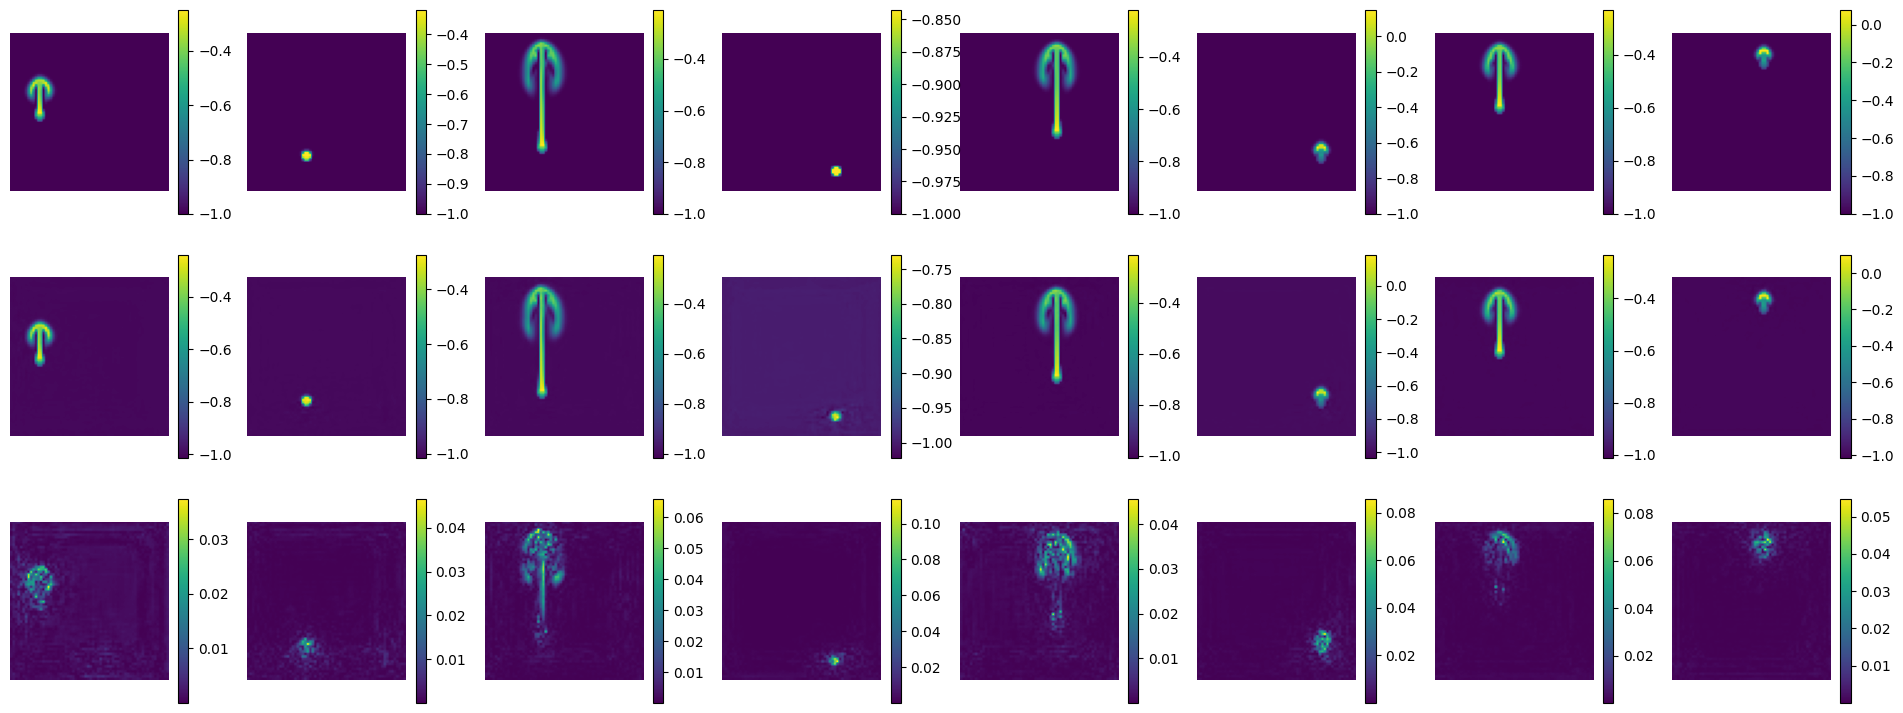

In [11]:
fig, ax = plt.subplots(3, 8, figsize=(24, 9))
for i in range(8):
    im1 = ax[0, i].imshow(x_rho[i, 0], origin='lower')
    plt.colorbar(im1, ax=ax[0, i])
    ax[0, i].set_axis_off()
    im2 = ax[1, i].imshow(x_rho_hat[i, 0], origin='lower')
    plt.colorbar(im2, ax=ax[1, i])
    ax[1, i].set_axis_off()
    im3 = ax[2, i].imshow(torch.abs(x_rho[i, 0]-x_rho_hat[i, 0]), origin='lower')
    plt.colorbar(im3, ax=ax[2, i])
    ax[2, i].set_axis_off()

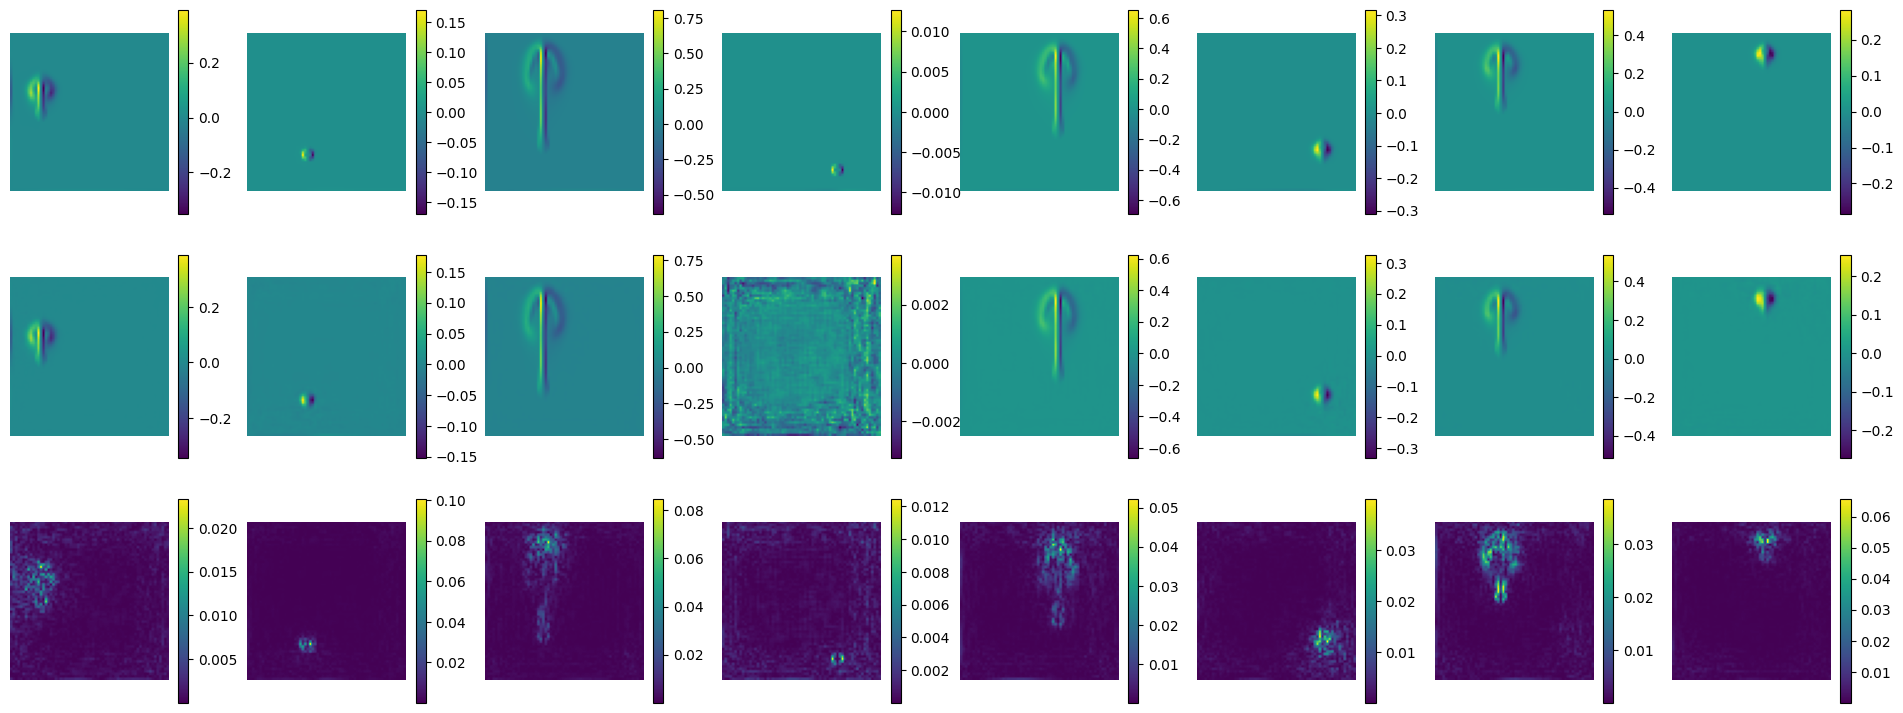

In [12]:
fig, ax = plt.subplots(3, 8, figsize=(24, 9))
for i in range(8):
    im1 = ax[0, i].imshow(x_vort[i, 0], origin='lower')
    plt.colorbar(im1, ax=ax[0, i])
    ax[0, i].set_axis_off()
    im2 = ax[1, i].imshow(x_vort_hat[i, 0], origin='lower')
    plt.colorbar(im2, ax=ax[1, i])
    ax[1, i].set_axis_off()
    im3 = ax[2, i].imshow(torch.abs(x_vort[i, 0]-x_vort_hat[i, 0]), origin='lower')
    plt.colorbar(im3, ax=ax[2, i])
    ax[2, i].set_axis_off()

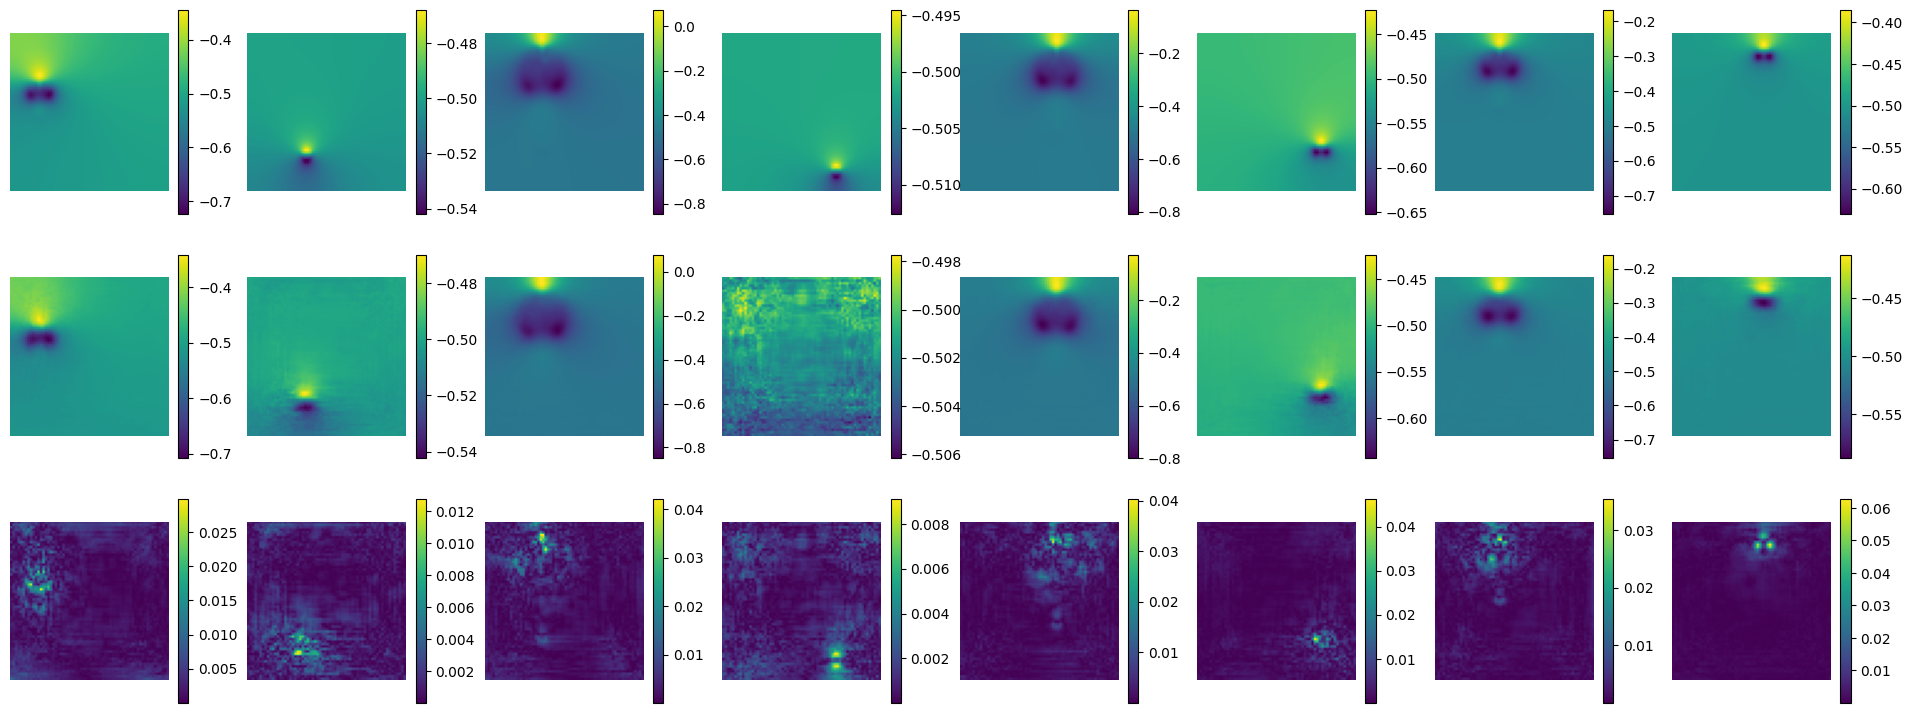

In [13]:
fig, ax = plt.subplots(3, 8, figsize=(24, 9))
for i in range(8):
    im1 = ax[0, i].imshow(x_pressure[i, 0], origin='lower')
    plt.colorbar(im1, ax=ax[0, i])
    ax[0, i].set_axis_off()
    im2 = ax[1, i].imshow(x_pressure_hat[i, 0], origin='lower')
    plt.colorbar(im2, ax=ax[1, i])
    ax[1, i].set_axis_off()
    im3 = ax[2, i].imshow(torch.abs(x_pressure[i, 0]-x_pressure_hat[i, 0]), origin='lower')
    plt.colorbar(im3, ax=ax[2, i])
    ax[2, i].set_axis_off()